In [1]:
import pandas as pd
import numpy as np
import re
import os
import shutil

import warnings
warnings.filterwarnings("ignore")

In [95]:
# import os
# print(os.getcwd())

In [2]:
data = pd.read_csv("merged_layer1_and_layer2.csv")

In [3]:
data.head()

,Unnamed: 0,ID,food_title,partition,recipe_url,ingredients,instructions,images_id,images_url
0,0,00003a70b1,Crunchy Onion Potato Bake,test,http://www.food.com/recipe/crunchy-onion-potat...,2 12 cups milk /t 1 12 cups water /t 14 cup bu...,Preheat oven to 350 degrees Fahrenheit. /t Spr...,3e233001e2.jpg /t 7f749987f9.jpg /t aaf6b2dcd3...,"http://img.sndimg.com/food/image/upload/w_512,..."
1,1,000075604a,Kombu Tea Grilled Chicken Thigh,train,https://cookpad.com/us/recipes/150100-kombu-te...,2 Chicken thighs /t 2 tsp Kombu tea /t 1 White...,Pierce the skin of the chicken with a fork or ...,6bdca6e490.jpg,https://img-global.cpcdn.com/001_recipes/58069...
2,2,00007bfd16,Strawberry Rhubarb Dump Cake,train,http://www.food.com/recipe/strawberry-rhubarb-...,"6 -8 cups fresh rhubarb, or /t 6 -8 cups froze...",Put ingredients in a buttered 9 x 12 x 2-inch ...,6409eab844.jpg /t f7cb3de295.jpg,"http://img.sndimg.com/food/image/upload/w_512,..."
3,3,000095fc1d,Yogurt Parfaits,train,http://tastykitchen.com/recipes/breakfastbrunc...,"8 ounces, weight Light Fat Free Vanilla Yogurt...",Layer all ingredients in a serving dish.,a1374cdd98.jpg,http://tastykitchen.com/recipes/wp-content/upl...
4,4,0000b1e2b5,Fennel-Rubbed Pork Tenderloin with Roasted Fen...,train,http://www.epicurious.com/recipes/food/views/f...,1 teaspoon fennel seeds /t 1 pound pork tender...,Preheat oven to 350F with rack in middle. /t C...,cb1a684683.jpg,http://assets.epicurious.com/photos/5609a4d662...


In [4]:
data.columns

Index(['Unnamed: 0', 'ID', 'food_title', 'partition', 'recipe_url',
       'ingredients', 'instructions', 'images_id', 'images_url'],
      dtype='object')

In [5]:
data.drop(['Unnamed: 0', 'recipe_url','ingredients', 'instructions', 'images_url'],inplace=True,axis=1)

In [6]:
data.columns

Index(['ID', 'food_title', 'partition', 'images_id'], dtype='object')

In [7]:
data.head(20)

,ID,food_title,partition,images_id
0,00003a70b1,Crunchy Onion Potato Bake,test,3e233001e2.jpg /t 7f749987f9.jpg /t aaf6b2dcd3...
1,000075604a,Kombu Tea Grilled Chicken Thigh,train,6bdca6e490.jpg
2,00007bfd16,Strawberry Rhubarb Dump Cake,train,6409eab844.jpg /t f7cb3de295.jpg
3,000095fc1d,Yogurt Parfaits,train,a1374cdd98.jpg
4,0000b1e2b5,Fennel-Rubbed Pork Tenderloin with Roasted Fen...,train,cb1a684683.jpg
5,0000c79afb,Pink Sangria,train,2f4b4c4452.jpg
6,00010379bf,Brown Sugar 'Karintou' Snacks,train,f480145da5.jpg
7,00010c7867,Grandmommy's Mexicali Meatloaf,train,3b99e69c3c.jpg /t 5ab32d58e0.jpg
8,00010d44c7,Broccoli Rice Bake,train,9f497dcfa5.jpg
9,00013266c9,Tinklee's Vanilla Crack,train,4636c7f576.jpg


In [8]:
data['partition'].value_counts()

train    281598
test      60740
val       60422
Name: partition, dtype: int64

In [9]:
data_train=data.loc[data['partition']=='train']
data_test=data.loc[data['partition']=='test']
data_val=data.loc[data['partition']=='val']

In [10]:
data_train.reset_index(inplace=True,drop=True)
data_test.reset_index(inplace=True,drop=True)
data_val.reset_index(inplace=True,drop=True)
data_train.shape,data_test.shape,data_val.shape

((281598, 4), (60740, 4), (60422, 4))

In [11]:
def duplicate_check(df):
   # Check for duplicates in 'food_title' column
    duplicates = df[df.duplicated('food_title')]
    if duplicates.empty:
        print("No duplicates found in the 'food_title' column.")
    else:
        print("Duplicates found in the 'food_title' column:")
        print(duplicates) 

In [12]:
duplicate_check(data_train)

Duplicates found in the 'food_title' column:
                ID                     food_title partition  \
569     00815ae6b9                Stuffed peppers     train   
982     00dc595d6f                 Zucchini Cakes     train   
1075    00f3548694              Black Bean Hummus     train   
1534    0152f86662      Mediterranean Pasta Salad     train   
1650    016daca2b4            Buttermilk Pancakes     train   
...            ...                            ...       ...   
281566  fff5d58cfa  Almond Brown Sugar Pound Cake     train   
281570  fff707d354         Orange Cranberry Bread     train   
281577  fff9cafaa6             French Bread Rolls     train   
281578  fffa1e5066            Ham and Potato Soup     train   
281581  fffa86ca61         Chicken Soup with Rice     train   

                               images_id  
569                       9e29fd6934.jpg  
982     8197c9c375.jpg /t 85973e5ad5.jpg  
1075                      1abb4e83d0.jpg  
1534                      

In [13]:
data_train.loc[data_train['food_title']=='Stuffed peppers']

,ID,food_title,partition,images_id
43,000a1936a3,Stuffed peppers,train,33df1c1c41.jpg
569,00815ae6b9,Stuffed peppers,train,9e29fd6934.jpg
99285,5a2cbb545a,Stuffed peppers,train,8f1d47384d.jpg
101387,5c18551c19,Stuffed peppers,train,1bd219d8b6.jpg /t 1ce9bab996.jpg /t 32673d5cd9...
139728,7f1231a49d,Stuffed peppers,train,7a228f830f.jpg
242096,dc3646e49f,Stuffed peppers,train,5d29031ccb.jpg
261694,edee8da6de,Stuffed peppers,train,1ee4ee7199.jpg


In [14]:
duplicate_check(data_test)


Duplicates found in the 'food_title' column:
               ID                    food_title partition  \
1463   067675d511                   Gingersnaps      test   
1601   07099dbc63            Pumpkin Eggnog Pie      test   
1890   082fbc270b               Apple Pie Bread      test   
1901   08374ae972                 Apple Crumble      test   
2436   0a54af44bb  Grilled Greek Chicken Kabobs      test   
...           ...                           ...       ...   
60704  ffd2a773c0       Mashed Potato Casserole      test   
60707  ffd473d498              Mini Me Sandwich      test   
60713  ffd773c753               Fluffy Pancakes      test   
60728  ffefc5b152  Irish Cream Chocolate Mousse      test   
60736  fffb4f3e7b             Easy Olive Spread      test   

                                               images_id  
1463                    48fd91ab55.jpg /t 9fd9d5d40d.jpg  
1601   4227324fed.jpg /t 904b8dc2da.jpg /t 9bd77a6adb...  
1890   49a653c81b.jpg /t 578c7cec48.jpg /t a7

In [15]:
duplicate_check(data_val)

Duplicates found in the 'food_title' column:
               ID                food_title partition  \
1003   04369b228b         Blueberry Muffins       val   
1165   04d7578e1a           Pumpkin Muffins       val   
1278   0551fb7116         Blueberry Muffins       val   
1477   061d0f46bb              Deviled Eggs       val   
1551   0670e601f2              Deviled Eggs       val   
...           ...                       ...       ...   
60366  ffc6393b53              Brownie Pops       val   
60377  ffcdf346f2      Homemade Pizza Dough       val   
60389  ffdd35030d      Healthy Banana Bread       val   
60390  ffe025dded  Bread and Butter Pudding       val   
60412  fff9833954     Blackened Green Beans       val   

                                               images_id  
1003   94fe501aed.jpg /t c29dd203f4.jpg /t d0c5643e18...  
1165                                      310cb1edc5.jpg  
1278                                      db897f0617.jpg  
1477                    54394002c0

In [16]:
data_val[data_val['food_title']=='Homemade Pizza Dough']

,ID,food_title,partition,images_id
24341,66c072d3e8,Homemade Pizza Dough,val,a21d9cff4c.jpg
60377,ffcdf346f2,Homemade Pizza Dough,val,59c33cb875.jpg


In [17]:
# List of columns to drop
#columns_to_drop = ['ID', 'partition']

# Drop specified columns
#data_test = data_test.drop(columns=columns_to_drop)

In [18]:
def modify_merge(data):
    data['images_id'] = data['images_id'].str.replace('/t', ',')
    # Group by 'food_title' and aggregate 'images_id' by combining them
    df_merged = data.groupby('food_title', as_index=False).agg({
            'images_id': ','.join  # Combine 'images_id' using a comma
                })
    return df_merged        

In [19]:
df_train=modify_merge(data_train)
df_test=modify_merge(data_test)
df_val=modify_merge(data_val)


In [20]:
duplicate_check(df_val)

No duplicates found in the 'food_title' column.


In [21]:
duplicate_check(df_train)

No duplicates found in the 'food_title' column.


In [22]:
duplicate_check(df_test)

No duplicates found in the 'food_title' column.


In [23]:
df_train.head()

,food_title,images_id
0,""" "" Recipe",02afdb4c71.jpg
1,""" Add Anything"" French Rolls or Baguettes",ad700e97ba.jpg
2,""" Add in Anything"" Muffins!","35939afa42.jpg , 4f5bfd3cd4.jpg , 92abacbafe.j..."
3,""" All In"" Meatless Mincemeat","0b26d6c143.jpg , d8ecad8bd4.jpg"
4,""" Angel Lush Trifle """,2fc5601160.jpg


In [24]:
df_test.head()

,food_title,images_id
0,""" Ant"" Kelly's London Broil Marinade","09b510fc07.jpg , 1714261c9a.jpg , 6a57558123.j..."
1,""" Atkins Friendly"" Cheesecake",e07ce12b97.jpg
2,""" Better Than Cinnabon"" Cinnamon Rolls",496bc7a5c6.jpg
3,""" Blueberry Muffins "" ( made with splenda )","38f4d0a545.jpg , bcefc7a187.jpg , e73e35bf0d.jpg"
4,""" CANDY APPLE JELLY """,2a3003c985.jpg


In [25]:
df_val[df_val['food_title']=='Homemade Pizza Dough']

,food_title,images_id
26556,Homemade Pizza Dough,"a21d9cff4c.jpg,59c33cb875.jpg"


In [26]:
df_train.loc[df_train['food_title']=='Stuffed peppers']

,food_title,images_id
214251,Stuffed peppers,"33df1c1c41.jpg,9e29fd6934.jpg,8f1d47384d.jpg,1..."


In [27]:
list(df_train['images_id'].loc[df_train['food_title']=='Stuffed peppers'])

['33df1c1c41.jpg,9e29fd6934.jpg,8f1d47384d.jpg,1bd219d8b6.jpg , 1ce9bab996.jpg , 32673d5cd9.jpg , 37b69f6cd3.jpg , 4dcd659428.jpg , 74567732f1.jpg , 808b3cc29d.jpg , 848e3a0d59.jpg , 8d3cc60da7.jpg , 8f770a68ad.jpg , a368308daa.jpg , b2ebc3853d.jpg , db5546849f.jpg , de258b6ae5.jpg , e3085b560b.jpg , e8e7bbe1bd.jpg,7a228f830f.jpg,5d29031ccb.jpg,1ee4ee7199.jpg']

In [28]:
df_train.reset_index(inplace=True,drop=True)
df_test.reset_index(inplace=True,drop=True)
df_val.reset_index(inplace=True,drop=True)
df_train.shape,df_test.shape,df_val.shape

((246010, 2), (57560, 2), (57229, 2))

In [29]:
data.loc[data['food_title']=='" " Recipe']

,ID,food_title,partition,images_id
193698,7b372faa16,""" "" Recipe",train,02afdb4c71.jpg


In [30]:
df_train.head()

,food_title,images_id
0,""" "" Recipe",02afdb4c71.jpg
1,""" Add Anything"" French Rolls or Baguettes",ad700e97ba.jpg
2,""" Add in Anything"" Muffins!","35939afa42.jpg , 4f5bfd3cd4.jpg , 92abacbafe.j..."
3,""" All In"" Meatless Mincemeat","0b26d6c143.jpg , d8ecad8bd4.jpg"
4,""" Angel Lush Trifle """,2fc5601160.jpg


In [31]:
# df_temp=df_train

In [32]:
def image_count(df_merged):
    df_merged['image_count'] = df_merged['images_id'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)
    df_merged = df_merged.sort_values(by='image_count', ascending=False)
    return df_merged

In [33]:
df_train=image_count(df_train)
df_test=image_count(df_test)
df_val=image_count(df_val)

In [34]:
df_test.head()

,food_title,images_id,image_count
4124,Banana Crumb Muffins,"00388793f8.jpg , 006c367195.jpg , 00ccb25e8b.j...",1035
50248,Sugar Cookie Icing,"001a132a3f.jpg , 00308d461e.jpg , 0037c4535d.j...",966
11001,Chicken Pot Pie IX,"001defbf8b.jpg , 00305aa742.jpg , 007e8b9a7c.j...",800
21016,Fluffy Pancakes,"027d79604e.jpg , 0388ade68b.jpg , 13a63374cb.j...",702
34343,Mrs. Sigg's Snickerdoodles,"002e327a8b.jpg , 007a047685.jpg , 01bfdd510a.j...",386


In [35]:
df_train.head()

,food_title,images_id,image_count
224015,The Best Rolled Sugar Cookies,"0037563ca4.jpg , 003b92c18f.jpg , 0068f4dd6a.j...",1647
137326,Marshmallow Fondant,"0008000c98.jpg , 001689aa9d.jpg , 001c9165c6.j...",1540
7122,Apple Pie by Grandma Ople,"001df0cb78.jpg , 0099f126e8.jpg , 00b685903b.j...",1325
226242,To Die For Blueberry Muffins,"001ea74601.jpg , 0049a29b83.jpg , 0084dedc7c.j...",997
39868,Chantal's New York Cheesecake,"000ebb143a.jpg , 00a4180adf.jpg , 01175d4ff8.j...",742


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

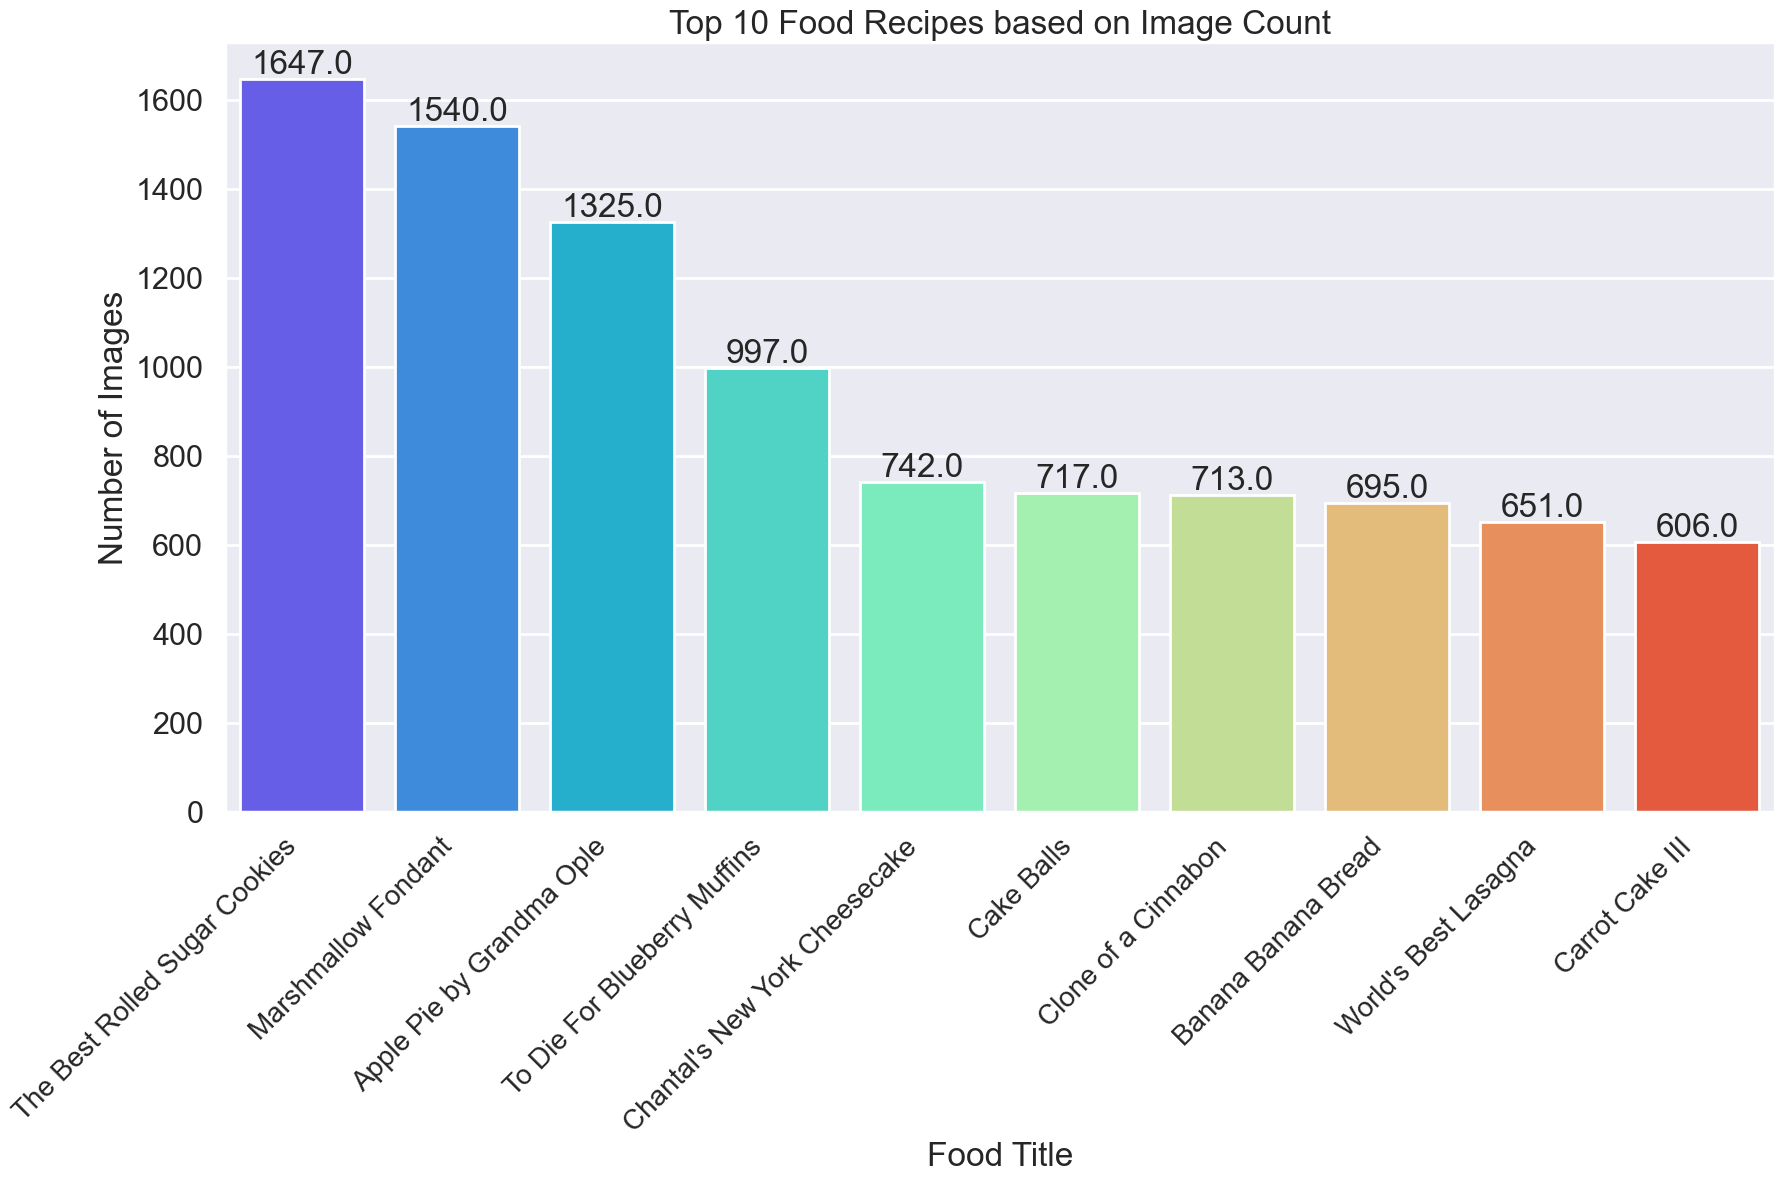

In [37]:
# Select the top 10 Food Titles
df_top10 = df_train.head(10)

# Set seaborn style and context
sns.set_context("poster")
sns.set_style("darkgrid")

# Create the plot
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45, horizontalalignment='right', fontsize='small')

ax = sns.barplot(x="food_title", y="image_count", data=df_top10, palette='rainbow')

# Annotate the bars with image_count values
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Food Title')
plt.ylabel('Number of Images')
plt.title('Top 10 Food Recipes based on Image Count')
plt.show()

In [38]:
df_val.head()

,food_title,images_id,image_count
5344,Best Chocolate Chip Cookies,"00011ef4c3.jpg , 0021833df3.jpg , 00baed5d92.j...",991
5321,"Best Big, Fat, Chewy Chocolate Chip Cookie","0000d643c9.jpg , 00253e2e7b.jpg , 002958c0e0.j...",921
53135,Too Much Chocolate Cake,"00117647ef.jpg , 00547ec935.jpg , 014382d3bb.j...",742
7827,Buttercream Icing,"005645da6f.jpg , 00893578e7.jpg , 0127631bb2.j...",533
43283,Rolled Buttercream Fondant,"000b5bafbd.jpg , 0031302660.jpg , 00c7984387.j...",435


In [39]:
len(df_train[df_train.image_count>=300])

45

In [40]:
# df_train[df_train.image_count>=250]

In [41]:
# Assuming df_train is your DataFrame
filtered_df = df_train[df_train['image_count'] >= 300]

# Extract food_title values from the filtered DataFrame and store in a list
food_title_list = filtered_df['food_title'].tolist()

# Print or use the food_title_list as needed
print(food_title_list)

['The Best Rolled Sugar Cookies', 'Marshmallow Fondant', 'Apple Pie by Grandma Ople', 'To Die For Blueberry Muffins', "Chantal's New York Cheesecake", 'Cake Balls', 'Clone of a Cinnabon', 'Banana Banana Bread', "World's Best Lasagna", 'Carrot Cake III', 'Award Winning Soft Chocolate Chip Cookies', 'Bomb Ass Potatoes', 'Amish White Bread', 'Bacon Wrapped Chicken Breast', 'White Chocolate Raspberry Cheesecake', 'Parmesan Chicken Squares', 'Good Old Fashioned Pancakes', 'Easy Sugar Cookies', 'Best Brownies', 'Cajun Chicken Pasta', 'Delicious Ham and Potato Soup', 'Chicken Parmesan', 'Peanut Butter Cup Cookies', 'Downeast Maine Pumpkin Bread', 'Black Magic Cake', "Rick's Special Buttercream Frosting", 'Cream Cheese Frosting II', 'Special Buttercream Frosting', "Grandma's Lemon Meringue Pie", 'Simple White Cake', 'Big Soft Ginger Cookies', 'Easy OREO Truffles', 'Soft Oatmeal Cookies', 'Tiramisu Layer Cake', 'Baked MAC and Cheese', 'Ninety Minute Cinnamon Rolls', 'Bread Pudding II', "Spooky 

In [137]:
# Assuming food_title_list is the list obtained from df_train
# Assuming df_val and df_test are your other DataFrames

# Check if the values in food_title_list exist in df_val
#matching_val = df_val[df_val['food_title'].isin(food_title_list)]

# Check if the values in food_title_list exist in df_test
#matching_test = df_test[df_test['food_title'].isin(food_title_list)]

# Print or use the matching DataFrames as needed
#print("Matching values in df_val:")
#print(matching_val)

#print("\nMatching values in df_test:")
#print(matching_test)


In [42]:
# Assuming food_title_list is the list obtained from df_train
# Assuming df_val and df_test are your other DataFrames

# Check if the values in food_title_list exist in df_val
matching_val = df_val[df_val['food_title'].isin(food_title_list)]['food_title'].tolist()

# Check if the values in food_title_list exist in df_test
matching_test = df_test[df_test['food_title'].isin(food_title_list)]['food_title'].tolist()

# Print matching and non-matching food_title values
print("Matching values in df_val:")
print(matching_val)

print(f"Matching values in df_val::{len(matching_val)}")



non_matching_val = list(set(food_title_list) - set(matching_val))
print("\nNon-matching values in df_val:")
print(non_matching_val)
print(f"Non Matching values in df_val::{len(matching_val)}")


print("\nMatching values in df_test:")
print(matching_test)
print(f"Matching values in df_test::{len(matching_test)}")


non_matching_test = list(set(food_title_list) - set(matching_test))
print("\nNon-matching values in df_test:")
print(non_matching_test)

print(f"Non-matching values in df_test::{len(non_matching_test)}")

Matching values in df_val:
['Red Velvet Cupcakes', 'Marshmallow Fondant', 'Easy Sugar Cookies', 'Cajun Chicken Pasta', 'Chicken Parmesan', 'White Chocolate Raspberry Cheesecake', "World's Best Lasagna", 'The Best Rolled Sugar Cookies', 'Alfredo Sauce', 'Apple Pie by Grandma Ople', 'Black Magic Cake', "Mom's Zucchini Bread", 'Award Winning Soft Chocolate Chip Cookies', 'Peanut Butter Cup Cookies', 'Soft Oatmeal Cookies', 'Easy OREO Truffles']
Matching values in df_val::16

Non-matching values in df_val:
["Rick's Special Buttercream Frosting", 'Delicious Ham and Potato Soup', 'Cake Balls', 'Chicken Cordon Bleu II', 'Bread Pudding II', 'Baked MAC and Cheese', 'Sweet, Sticky and Spicy Chicken', 'Bomb Ass Potatoes', 'Bacon Wrapped Chicken Breast', 'Good Old Fashioned Pancakes', 'Carrot Cake III', 'Cream Cheese Frosting II', 'Clone of a Cinnabon', 'Downeast Maine Pumpkin Bread', 'Amish White Bread', 'Simple White Cake', 'Best Brownies', 'Tiramisu Layer Cake', 'Broiled Tilapia Parmesan', 'Spe

In [43]:
df_train['food_title'].nunique()

246010

In [44]:
df_test['food_title'].nunique()

57560

In [45]:
df_val['food_title'].nunique()

57229

In [46]:
df_train.head(50)

,food_title,images_id,image_count
224015,The Best Rolled Sugar Cookies,"0037563ca4.jpg , 003b92c18f.jpg , 0068f4dd6a.j...",1647
137326,Marshmallow Fondant,"0008000c98.jpg , 001689aa9d.jpg , 001c9165c6.j...",1540
7122,Apple Pie by Grandma Ople,"001df0cb78.jpg , 0099f126e8.jpg , 00b685903b.j...",1325
226242,To Die For Blueberry Muffins,"001ea74601.jpg , 0049a29b83.jpg , 0084dedc7c.j...",997
39868,Chantal's New York Cheesecake,"000ebb143a.jpg , 00a4180adf.jpg , 01175d4ff8.j...",742
35195,Cake Balls,"0032312a00.jpg , 00d072475f.jpg , 011a8811a7.j...",717
58097,Clone of a Cinnabon,"003fe92744.jpg , 0110bb56b8.jpg , 018d9a9340.j...",713
17105,Banana Banana Bread,"00993016a6.jpg , 0812c3cbfa.jpg , 092726ae7e.j...",695
241540,World's Best Lasagna,"405306641c.jpg,0015ad3344.jpg , 00216aad83.jpg...",651
38177,Carrot Cake III,"0001e7af21.jpg , 00289ba8b4.jpg , 003c0b9b7c.j...",606


In [48]:
food_title_list

['The Best Rolled Sugar Cookies',
 'Marshmallow Fondant',
 'Apple Pie by Grandma Ople',
 'To Die For Blueberry Muffins',
 "Chantal's New York Cheesecake",
 'Cake Balls',
 'Clone of a Cinnabon',
 'Banana Banana Bread',
 "World's Best Lasagna",
 'Carrot Cake III',
 'Award Winning Soft Chocolate Chip Cookies',
 'Bomb Ass Potatoes',
 'Amish White Bread',
 'Bacon Wrapped Chicken Breast',
 'White Chocolate Raspberry Cheesecake',
 'Parmesan Chicken Squares',
 'Good Old Fashioned Pancakes',
 'Easy Sugar Cookies',
 'Best Brownies',
 'Cajun Chicken Pasta',
 'Delicious Ham and Potato Soup',
 'Chicken Parmesan',
 'Peanut Butter Cup Cookies',
 'Downeast Maine Pumpkin Bread',
 'Black Magic Cake',
 "Rick's Special Buttercream Frosting",
 'Cream Cheese Frosting II',
 'Special Buttercream Frosting',
 "Grandma's Lemon Meringue Pie",
 'Simple White Cake',
 'Big Soft Ginger Cookies',
 'Easy OREO Truffles',
 'Soft Oatmeal Cookies',
 'Tiramisu Layer Cake',
 'Baked MAC and Cheese',
 'Ninety Minute Cinnamon R

In [49]:
df_filter = df_train[df_train['food_title'].isin(food_title_list)]

In [50]:
df_filter['food_title'].nunique()

45

In [51]:
# # Function to clean the 'food_title' column
# def clean_food_title(title):
#     # Remove Roman numerals
# #     title_no_roman = re.sub(r'\b[IVXLCDM]+\b', '', title)
#     # Remove numbers, special characters, and apostrophes
#     cleaned_title = re.sub(r'[^A-Za-z\s]', '', title)
#     # Convert to lowercase and replace spaces with underscores
#     cleaned_title = cleaned_title.lower().replace(' ', '_')
#     return cleaned_title
# # Apply the cleaning function to the 'food_title' column
# df_final['cleaned_food_title'] = df_final['food_title'].apply(clean_food_title)

In [56]:
df_filter.reset_index(inplace=True,drop=True)

In [57]:
df_filter.head()

,food_title,images_id,image_count
0,The Best Rolled Sugar Cookies,"0037563ca4.jpg , 003b92c18f.jpg , 0068f4dd6a.j...",1647
1,Marshmallow Fondant,"0008000c98.jpg , 001689aa9d.jpg , 001c9165c6.j...",1540
2,Apple Pie by Grandma Ople,"001df0cb78.jpg , 0099f126e8.jpg , 00b685903b.j...",1325
3,To Die For Blueberry Muffins,"001ea74601.jpg , 0049a29b83.jpg , 0084dedc7c.j...",997
4,Chantal's New York Cheesecake,"000ebb143a.jpg , 00a4180adf.jpg , 01175d4ff8.j...",742


In [62]:
# import os
# import shutil

# def create_class_folder(df, folder_path_img, original_path):
    
#     for cleaned_title in df['food_title']:
#         folder_path = os.path.join(folder_path_img, cleaned_title)
#         os.makedirs(folder_path, exist_ok=True)

#     # Copy images into the corresponding folders
#     for index, row in df.iterrows():
#         cleaned_title = row['food_title']
#         folder_path = os.path.join(folder_path_img, cleaned_title)

#         # Split the images_id and copy each image to the folder
#         for image_filename in row['images_id'].split(','):
#             image_filename = image_filename.strip()
#             src_path = os.path.join(original_path, image_filename)
#             dest_path = os.path.join(folder_path, image_filename)

#             # Check if the file already exists at the destination
#             if not os.path.exists(dest_path):
#                 try:
#                     shutil.copy(src_path, dest_path)
#                     print(f"Image '{image_filename}' copied to '{cleaned_title}' folder.")
#                 except Exception as e:
#                     print(f"Error copying image '{image_filename}': {e}")
#             else:
#                 print(f"Image '{image_filename}' already exists in '{cleaned_title}' folder.")

#     print("Images copied to folders based on 'food_title'")


In [60]:
def create_class_folder(df,folder_path_img,original_path):
    
    for cleaned_title in df['food_title']:
        folder_path = os.path.join(folder_path_img, cleaned_title)
        os.makedirs(folder_path, exist_ok=True)

    # Copy images into the corresponding folders
    for index, row in df.iterrows():
        cleaned_title = row['food_title']
        folder_path = os.path.join(folder_path_img, cleaned_title)

        # Split the images_id and copy each image to the folder
        for image_filename in row['images_id'].split(','):
            image_filename = image_filename.strip()
            src_path = os.path.join(original_path, image_filename)
            dest_path = os.path.join(folder_path, image_filename)
            shutil.copy(src_path, dest_path)

    print("Images copied to folders based on 'food_title'")

In [61]:
# Path to the 'test' folder
folder_path_img = 'train_dataset'
original_path = 'E:/Masters/2024/498/Recipe1M/Images/train_images'


create_class_folder(df_filter,folder_path_img,original_path)

Images copied to folders based on 'food_title'


In [73]:
import os

original_path = 'train_dataset'

# Get a list of all subdirectories (class folders) in the original_path
class_folders = [folder for folder in os.listdir(original_path) if os.path.isdir(os.path.join(original_path, folder))]

if not class_folders:
    print(f"No subdirectories (class folders) found in the specified path: {original_path}")
else:
    # Iterate through each class folder and count the number of images
    for folder in class_folders:
        folder_path = os.path.join(original_path, folder)
        images = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]
        num_images = len(images)
        print(f"Class '{folder}' has {num_images}")


Class 'Alfredo Sauce' has 300
Class 'Amish White Bread' has 530
Class 'Apple Pie by Grandma Ople' has 1325
Class 'Award Winning Soft Chocolate Chip Cookies' has 590
Class 'Bacon Wrapped Chicken Breast' has 515
Class 'Baked MAC and Cheese' has 334
Class 'Banana Banana Bread' has 695
Class 'Best Brownies' has 428
Class 'Big Soft Ginger Cookies' has 349
Class 'Black Magic Cake' has 379
Class 'Bomb Ass Potatoes' has 570
Class 'Bread Pudding II' has 331
Class 'Broiled Tilapia Parmesan' has 303
Class 'Cajun Chicken Pasta' has 396
Class 'Cake Balls' has 717
Class 'Carrot Cake III' has 606
Class 'Chantal's New York Cheesecake' has 742
Class 'Chicken Cordon Bleu II' has 309
Class 'Chicken Parmesan' has 392
Class 'Clone of a Cinnabon' has 713
Class 'Cream Cheese Frosting II' has 373
Class 'Delicious Ham and Potato Soup' has 394
Class 'Downeast Maine Pumpkin Bread' has 379
Class 'Easy Chicken with Broccoli' has 318
Class 'Easy OREO Truffles' has 342
Class 'Easy Sugar Cookies' has 433
Class 'Good 